# <center> Практические задания по цифровой обработке сигналов </center>
# <center> Первая лабораторная работа </center>


В данной работе Вы познакомитесь с основными методами работы с аудиоданными в Python. Разбересь в том, как работает свертка, и примените пару интересных фильтров.

# Задание 1. Работа с аудиофайлами в Python (1 балл)

## Теория

Звук - это аналоговый сигнал. То есть он является непрерывным по времени и по значениям. Для того, чтобы работать со звуком на цифровом устройстве, надо преобразовать его в цифровое представление. Для этого надо разделить непрерывный сигнал на промежутки времени (дискретизация сигнала) и разбить непрерывные значения на интервалы (квантование сигнала). Выбраные параметры дискретизации и квантования сигнала напрямую влияют на качество цифрового сигнала. 

<!-- 
## Практика

1. Что хранится в .wav файле? Как узнать параметры дискретизации и квантования .wav файла? 

2. Запишите аудиофайл со своим голосом. Загрузите его. Попробуйте поменять ему частоту дискретизации. Нарисуйте форму волны считанного файла. Воспроизведите полученные сигналы. При какой частоте дискретизации становится невозможно разобрать человеческую речь?   

3. Чем .wav отличается от других кодеков, например .mp3 или .ogg? -->


<!-- ### Подсказка

Записать цифровой сигнал можно при помощи, например, [Audacity](https://www.audacityteam.org) или [Adobe Audition](https://www.adobe.com/ru/products/audition.html). Для считывания файлов воспользуйтесь библиотекой [scipy](https://www.scipy.org) или [librosa](https://librosa.org/doc/latest/index.html). Для воспроизведения аудиофайла удобно использовать класс Audio из модуля IPython.display, а для отрисовки - matplotlib. -->

In [1]:
import matplotlib.pyplot as plt 
import numpy as np
%matplotlib inline

### 1. Что хранится в .wav файле? Как узнать параметры дискретизации и квантования .wav файла?

Файлы формата WAV (Waveform Audio File Format) содержат аудиоданные, такие как музыкальные записи, речь и звуковые эффекты. Для получения информации о параметрах дискретизации и квантования WAV-файла, можно воспользоваться различными инструментами. Можно привести пример

In [2]:
import wave
file_path = 'resources/bach_orig.wav'
wav_file = wave.open(file_path, 'rb')

sample_width = wav_file.getsampwidth()
frame_rate = wav_file.getframerate()
num_channels = wav_file.getnchannels()

wav_file.close()

print(f"Ширина выборки (в байтах): {sample_width}")
print(f"Частота кадров (в Гц): {frame_rate}")
print(f"Количество каналов: {num_channels}")

Ширина выборки (в байтах): 2
Частота кадров (в Гц): 44100
Количество каналов: 1


### 2. Запишите аудиофайл со своим голосом. Загрузите его. Попробуйте поменять ему частоту дискретизации. Нарисуйте форму волны считанного файла. Воспроизведите полученные сигналы. При какой частоте дискретизации становится невозможно разобрать человеческую речь?

**Подсказка**

Записать цифровой сигнал можно при помощи, например, [Audacity](https://www.audacityteam.org) или [Adobe Audition](https://www.adobe.com/ru/products/audition.html). Для считывания файлов воспользуйтесь библиотекой [scipy](https://www.scipy.org) или [librosa](https://librosa.org/doc/latest/index.html). Для воспроизведения аудиофайла удобно использовать класс Audio из модуля IPython.display, а для отрисовки - matplotlib.

In [3]:
import sounddevice as sd
import numpy as np
import scipy.io.wavfile as wavfile
import librosa
import IPython.display as ipd
import matplotlib.pyplot as plt

# Запись аудиофайла с микрофона
def record_audio(file_name, duration=5, sample_rate=44100):
    audio_data = sd.rec(int(duration * sample_rate), sample_rate, channels=1, dtype=np.int16)
    sd.wait()
    wavfile.write(file_name, sample_rate, audio_data)

# Загрузка аудиофайла
def load_audio(file_name, sample_rate=None):
    audio, loaded_sample_rate = librosa.load(file_name, sr=sample_rate)
    return audio, loaded_sample_rate

def resample_audio(audio, old_sample_rate, new_sample_rate):
    return librosa.resample(audio, old_sample_rate, new_sample_rate)

def plot_waveform(audio, sample_rate):
    time = np.arange(0, len(audio)) / sample_rate
    plt.figure(figsize=(10, 4))
    plt.plot(time, audio, linewidth=0.5)
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')
    plt.title('Waveform')
    plt.show()


In [27]:
record_audio("my_voice.wav", duration=5)

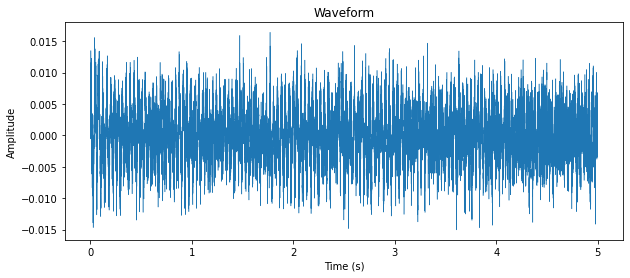

In [28]:
my_voice1, tw_sr = librosa.core.load("my_voice.wav")
player = ipd.Audio(my_voice1, rate=tw_sr)
ipd.display(player)
plot_waveform(my_voice, tw_sr)

In [33]:
new_sample_rate = 300
resampled_audio = resample_audio(my_voice1, tw_sr, new_sample_rate)

/tmp/ipykernel_12741/535740035.py:20: FutureWarning: Pass orig_sr=22050, target_sr=300 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  return librosa.resample(audio, old_sample_rate, new_sample_rate)


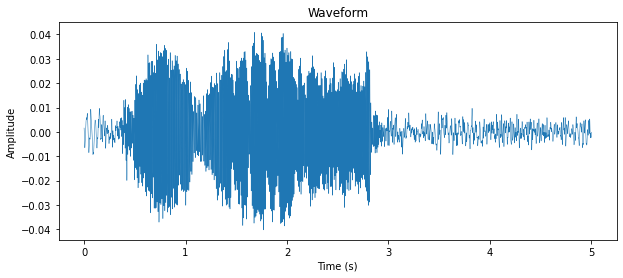

In [34]:
import scipy.io.wavfile as wavfile

output_file = "resampled_audio.wav"
wavfile.write(output_file, new_sample_rate, resampled_audio)
my_voice, tw_sr = librosa.core.load("resampled_audio.wav")
player = ipd.Audio(my_voice, rate=tw_sr)
ipd.display(player)
plot_waveform(my_voice, tw_sr)

При 300 уже ничего не разобрать

### 3. Чем .wav отличается от других кодеков, например .mp3 или .ogg?

WAV (Waveform Audio File Format):

WAV - это некомпрессированный аудиоформат. Это означает, что он сохраняет аудиоданные без потерь качества.
WAV-файлы обычно занимают больше места на диске по сравнению с форматами, которые используют сжатие данных.
WAV поддерживает различные параметры дискретизации, битовой глубины и количества каналов, что делает его универсальным форматом для аудиоинженерии и профессиональной обработки звука.
MP3 (MPEG Audio Layer III):

MP3 - это сжатый аудиоформат, который удаляет часть аудиоданных, чтобы уменьшить размер файла.
MP3-файлы могут быть сильно сжаты, что делает их более компактными и удобными для хранения и передачи через интернет.
Сжатие MP3 ведет к потере некоторого качества аудио, и уровень сжатия может варьироваться.
OGG (Ogg Vorbis):

OGG - это еще один сжатый аудиоформат, альтернатива MP3.
OGG Vorbis также сжимает аудиоданные, но он использует бесплатный и открытый кодек, что делает его более гибким в плане лицензирования и бесплатным для использования.
ОGG-файлы обычно обладают немного лучшим качеством звука при одинаковом уровне сжатия по сравнению с MP3.
Выбор между этими форматами зависит от потребностей. Если важно сохранить максимальное качество звука, то предпочтителен WAV. Если нужно экономить место на диске или передавать файлы через интернет, MP3 и OGG могут быть более подходящими вариантами.

# Задание 2. Гармонические сигналы (1 балл)

## Теория
[Гармонические колебания](https://ru.wikipedia.org/wiki/Гармонические_колебания) -  колебания, при которых физическая величина изменяется с течением времени по гармоническому (синусоидальному/косинусоидальному) закону. 

В общем случае гармонические колебания задаются формулой:

$$y=A \cos(\omega t+\varphi_0)$$

где $А$ - это амплитуда, $\omega$ – циклическая частота (радиан/с), $\varphi$ - фаза (сдвиг), $t$ – время. 


In [4]:
# Сначала определим функцию для отрисовки сигнала с хорошим масштабом и сеткой
# Это поможет легче анализировать сигнал
def draw_signal(data, figsize=(14, 14)):
    plt.figure(figsize=figsize)
    plt.plot(data, linewidth=2)
    plt.minorticks_on()
    plt.xticks(np.arange(0, 1000, step=100))
    plt.yticks(np.arange((data.min().round())//10*10, 
                         (data.max().round())//10*10+10, step=5))
    plt.grid(which='major',
        color = 'k', 
        linewidth = 1)
    plt.grid(which='minor', 
        color = 'k', 
        linestyle = ':')
    plt.show()

In [5]:
# Читаем данные с подготовленными сигналами
import pickle
with open("resources/data.pickle", "rb") as f:
    test_data = pickle.load(f)
# Теперь можно приступать к практике!

## Практика

Постройте графики трех сигналов a, b и c из test_data['task2']. Попробуйте подобрать коэффициенты для этих сигналов. Сгенерируйте сигналы (1000 отсчетов) с подобранными коэффициентами. Постройте графики сгенерированных сигналов и пройдите тест на схожесть с оригинальным.


Подсказка. Фаза, период и амплитуда сигнала - целочисленные. Для генерации пользуйтесь библиотекой numpy и функциями arange, sin, cos.

### Сигнал ***a***

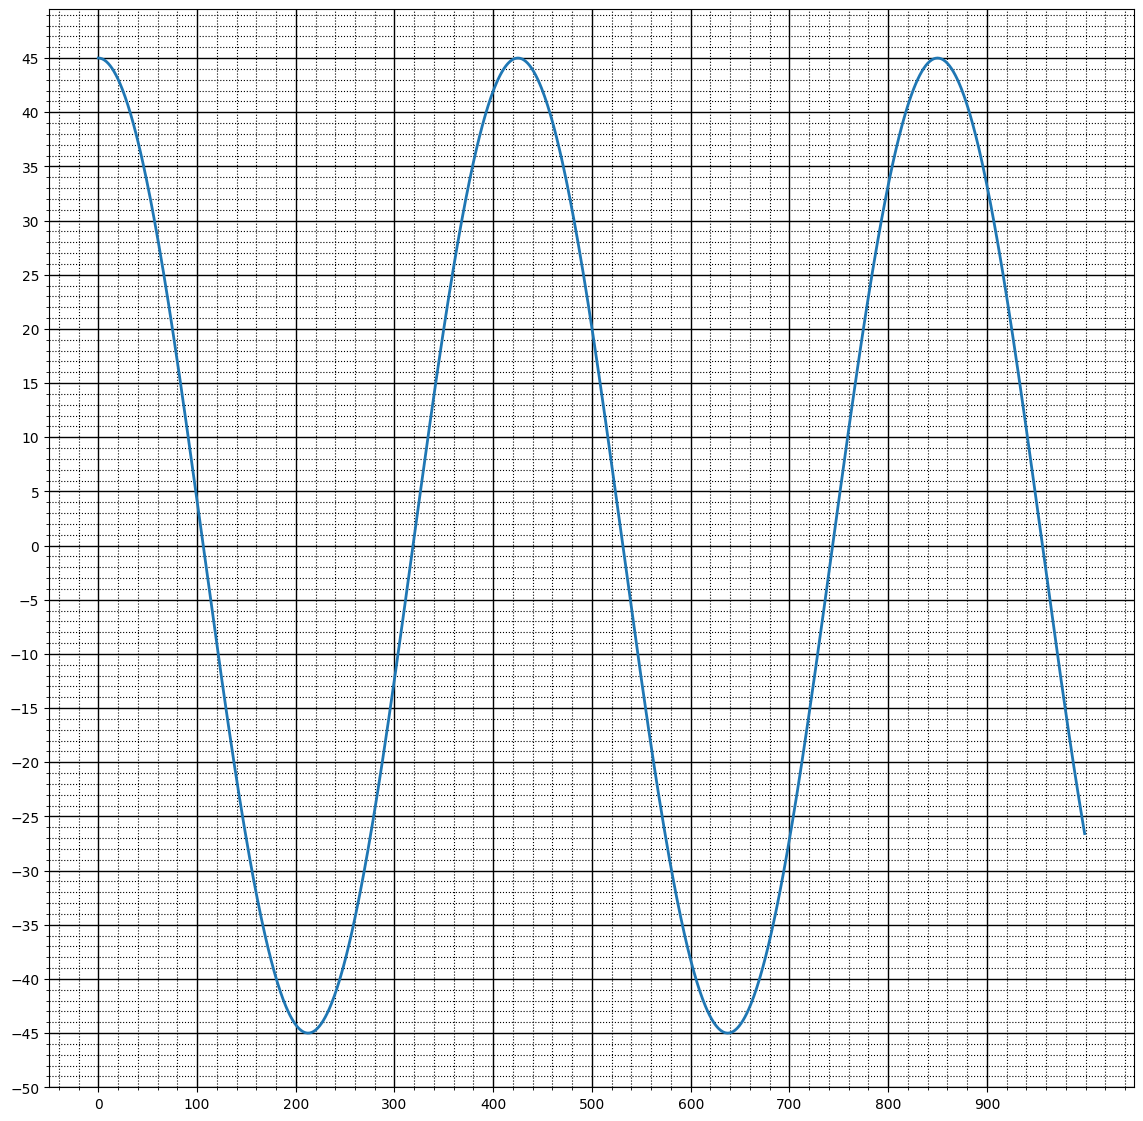

In [6]:
draw_signal(test_data['task2']['a'])

In [74]:
"""
Две функции перебора. Первая исходит из предположения, что фаза равна 0. Вторая подбирает и то и другое
"""

def find_1(amplitude, original_signal, phase=0):
    t = np.arange(1000)
    for T in range(1,1000):
        frequency = 2 * np.pi / T
        signal_sin = amplitude * np.sin(t * frequency + phase)
        signal_cos = amplitude * np.cos(t * frequency + phase)
        if np.allclose(signal_sin, original_signal, atol=1):
            print(f"T -- {T}, фаза ---{phase}, угловая частота --- {frequency}, sinus")
            return signal_sin
        elif np.allclose(signal_cos, original_signal, atol=1):
            print(f"T -- {T}, фаза ---{phase}, угловая частота --- {frequency}, cosinus")
            return signal_cos
def find_2(amplitude, original_signal):
    t = np.arange(1000)
    
    for T in range(1,1000):
        frequency = 2 * np.pi / T
        for phase in range(-1000,1000):
            signal_sin = amplitude * np.sin(t * frequency + phase)
            signal_cos = amplitude * np.cos(t * frequency + phase)
            if np.allclose(signal_sin, original_signal, atol=1):
                print(f"T -- {T}, фаза ---{phase}, угловая частота --- {frequency}, sinus")
                return signal_sin
            elif np.allclose(signal_cos, original_signal, atol=1):
                print(f"T -- {T}, фаза ---{phase}, угловая частота --- {frequency}, cosinus")
                return signal_cos
                

In [72]:
#амплитуду видно по графику 

signal  = find_1(45, test_data['task2']['a'])
a = signal

T -- 425, фаза ---0, угловая частота --- 0.01478396542865785, cosinus


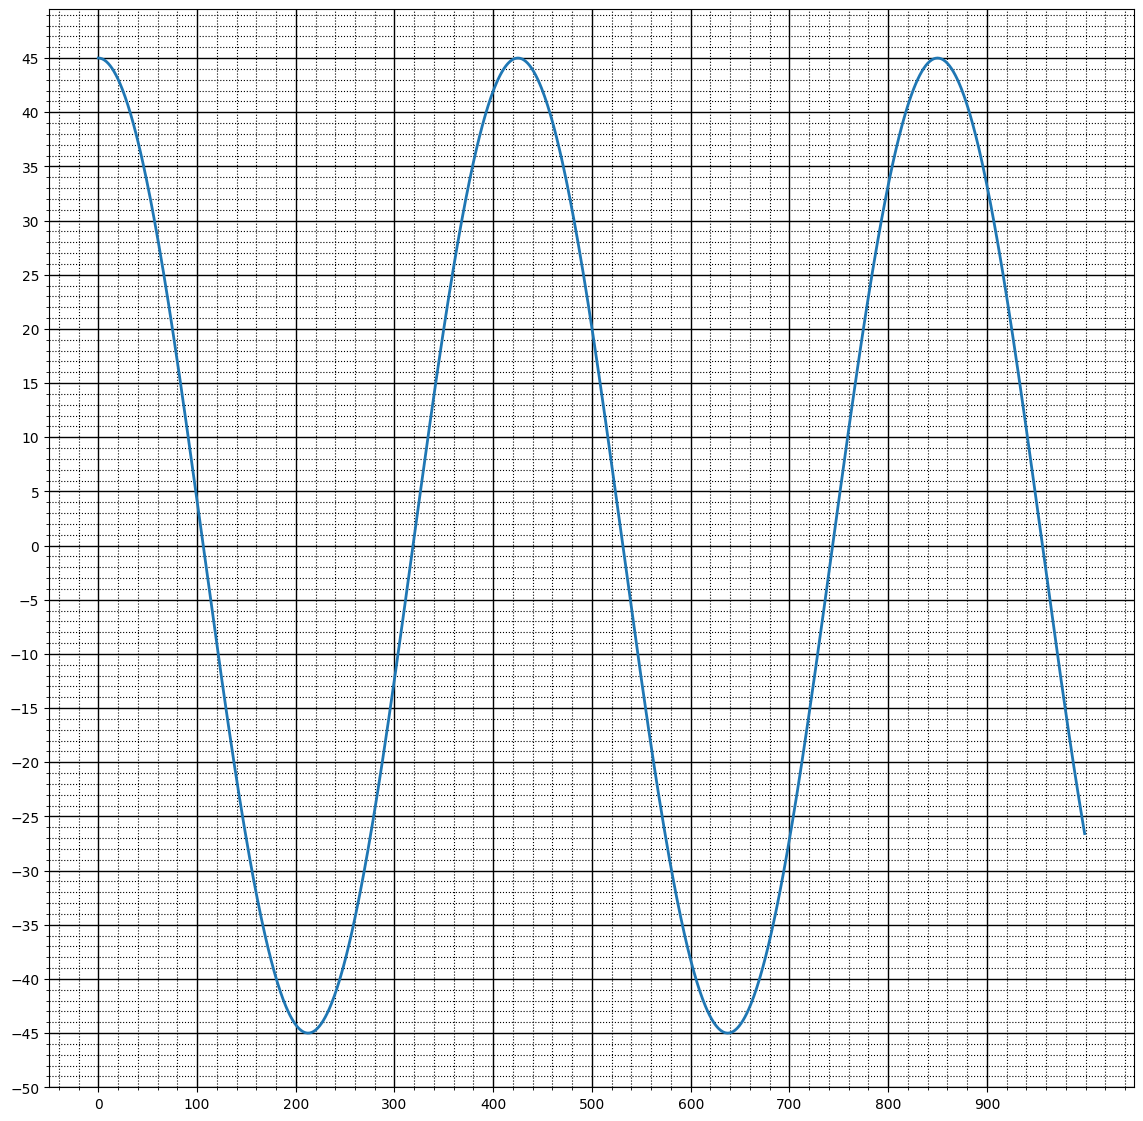

In [73]:
draw_signal(a)

In [38]:
assert len(a) == 1000
assert np.allclose(a, test_data["task2"]["a"], atol=1)
print("Ok!")

Ok!


In [75]:
signal  = find_2(45, test_data['task2']['a'])
a = signal

T -- 424, фаза ----765, угловая частота --- 0.014818833271649968, sinus


In [76]:
assert len(a) == 1000
assert np.allclose(a, test_data["task2"]["a"], atol=1)
print("Ok!")

Ok!


**Подобранные коэффициенты для сигнала 'a':**

1. Амплитуда - $A= $45

2. Угловая частота ($ \displaystyle\omega =\frac{2\pi}{T}) = $0.01478396542865785

3. Фаза - $\phi= $0

### Сигнал ***b***

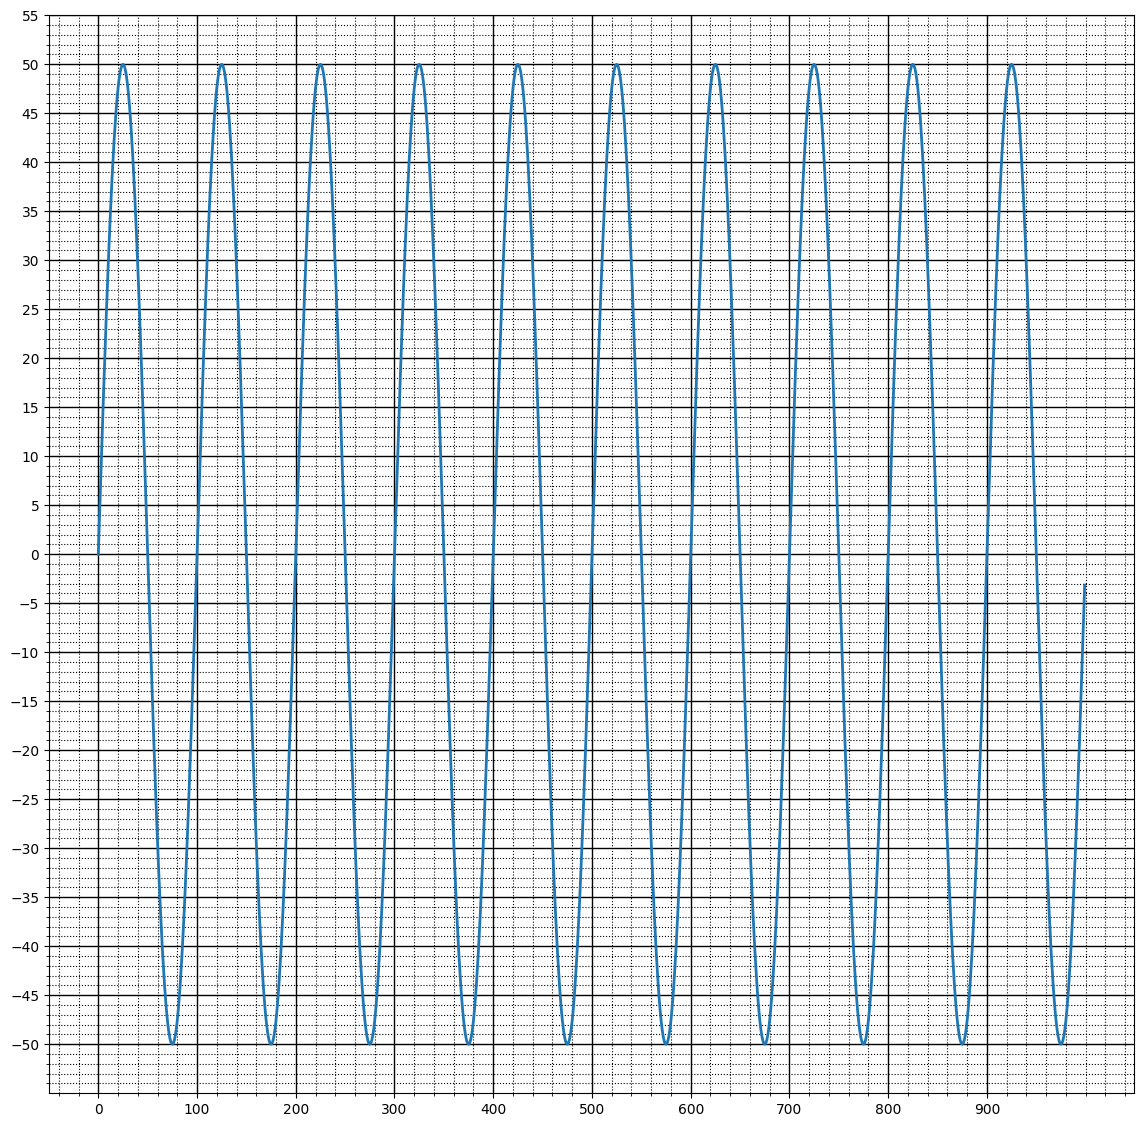

In [77]:
draw_signal(test_data['task2']['b'])

In [78]:
singal = find_1(50, test_data["task2"]["b"])
b = singal

T -- 100, фаза ---0, угловая частота --- 0.06283185307179587, sinus


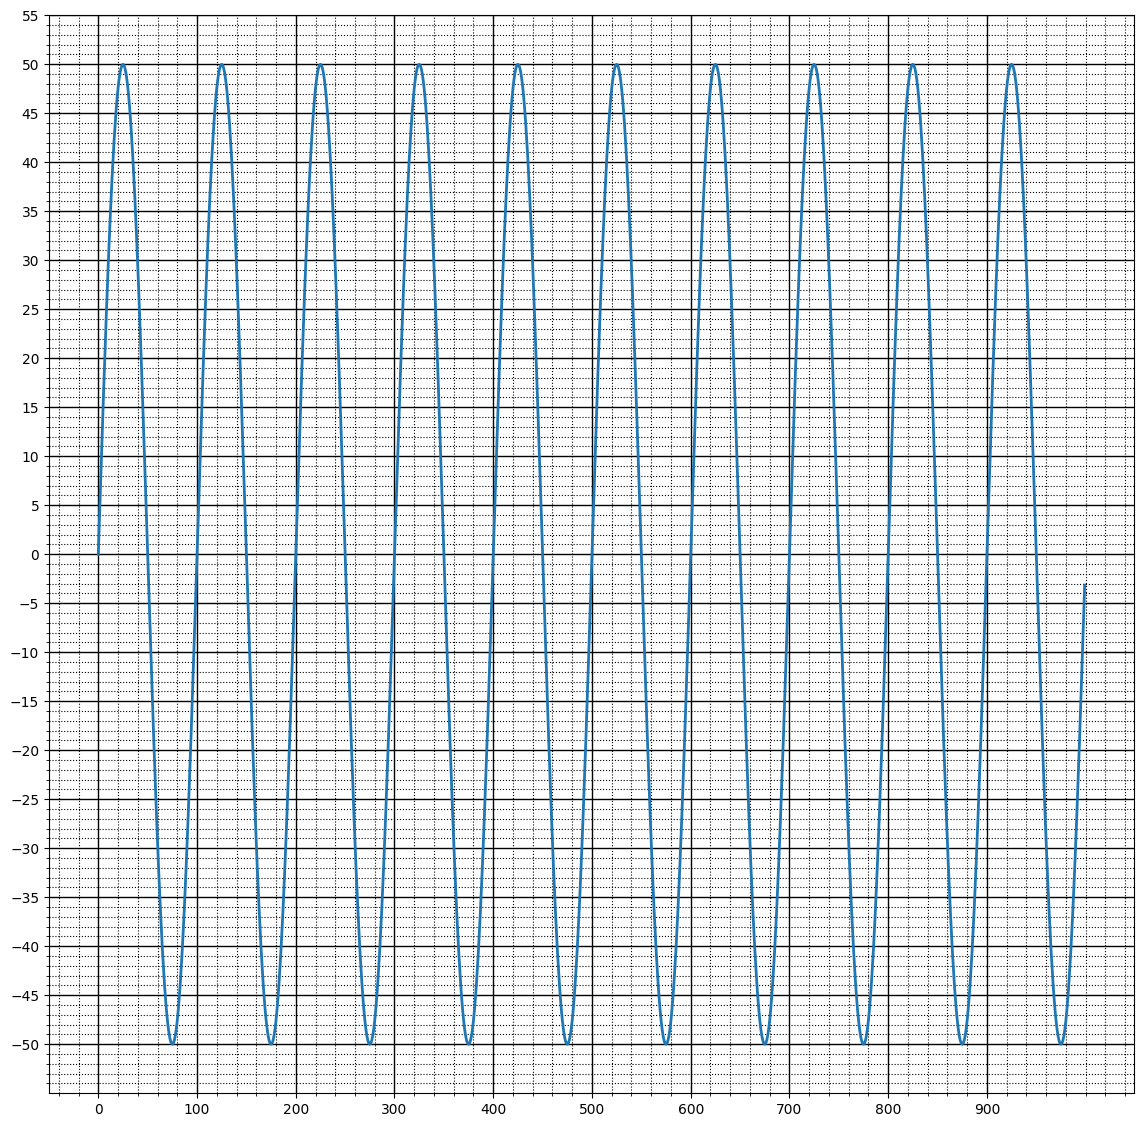

In [79]:
draw_signal(b)

In [80]:
assert len(b)== 1000
assert np.allclose(b, test_data["task2"]["b"], atol=1)
print("Ok!")

Ok!


**Подобранные коэффициенты для сигнала 'b':**

1. Амплитуда - $A= $50

2. Угловая частота ($ \displaystyle\omega =\frac{2\pi}{T}) = $0.06283185307179587

3. Фаза - $\phi= $0

In [81]:
singal = find_2(50, test_data["task2"]["b"])
b = singal
assert len(b)== 1000
assert np.allclose(b, test_data["task2"]["b"], atol=1)
print("Ok!")

T -- 100, фаза ----754, угловая частота --- 0.06283185307179587, sinus
Ok!


### Сигнал ***c***

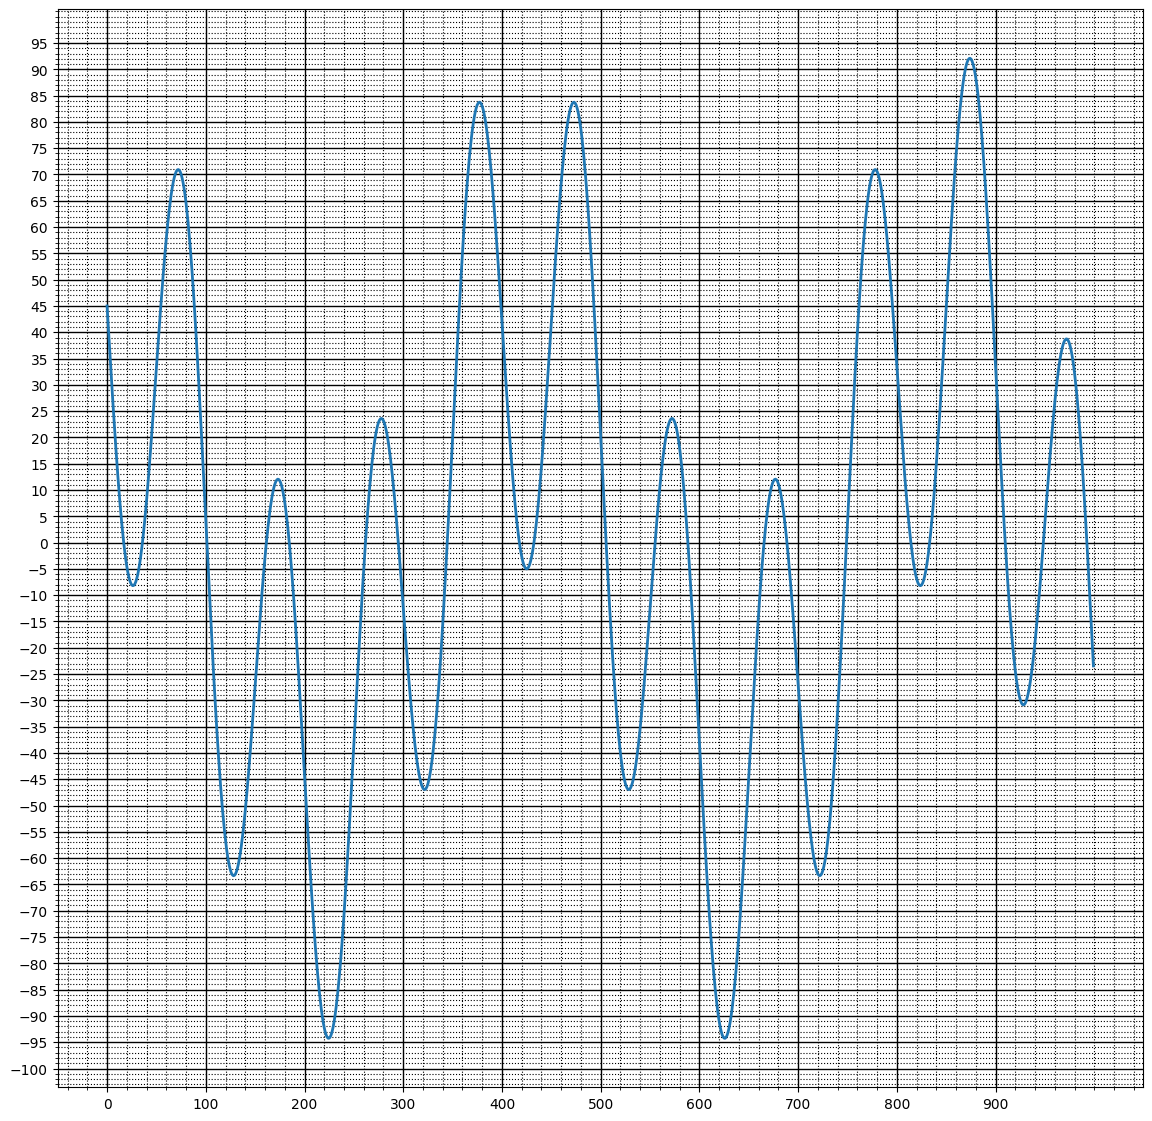

In [82]:
draw_signal(test_data['task2']['c'])

In [85]:
# сигнал состоит из двух гармоник
def find2(original_signal):
    t = np.arange(1000)
    for phase_1 in range(-1000,1000):
        signal_a = 45 * np.cos(t *  (2 * np.pi / 425) + phase_1)
        for phase_2 in range(-1000,1000):
            signal_b = 50 * np.sin(t * (2 * np.pi / 100)+ phase_2)
            combined = signal_a + signal_b 
            if np.allclose(combined, original_signal, atol=1):
                print(f'Фаза 1 ---- {phase_1} и фаза 2 ---- {phase_2}')
                return combined

c = find2(test_data["task2"]["c"])

Фаза 1 ---- -754 и фаза 2 ---- -355


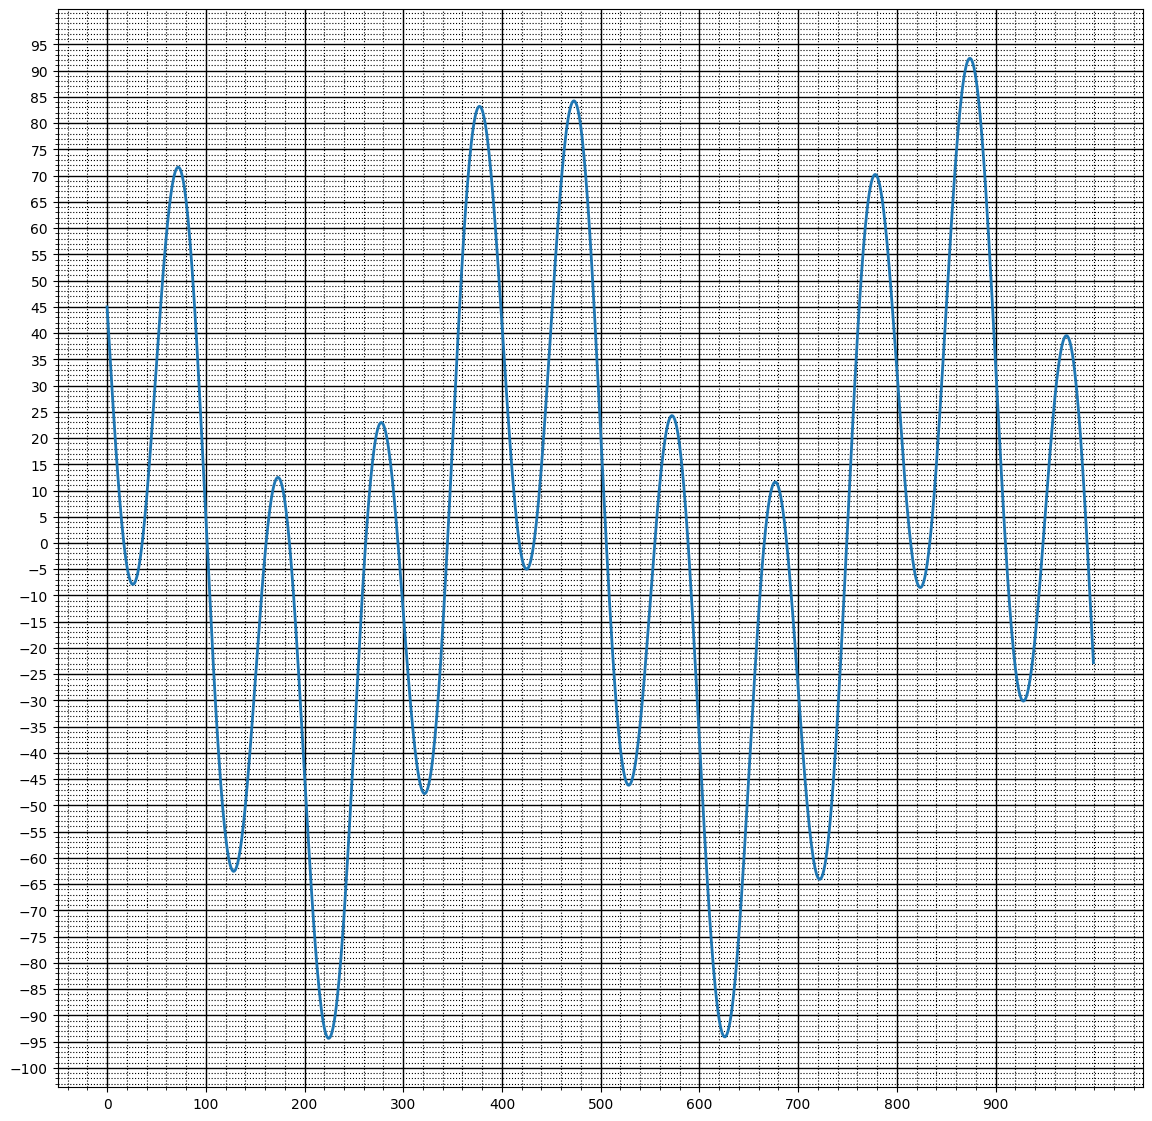

In [88]:
draw_signal(c)

In [89]:
assert len(c)== 1000
assert np.allclose(c, test_data["task2"]["c"], atol=1)
print("Ok!")

Ok!


# Задание 3. Свертка (3 балла)

## Теория
Одна из наиболее частых операций, которая выполняется при обработке сигналов, это свёртка. Свёртка имеет много различных применений, например, с ее помощью можно убрать из сигнала шумы или применить к сигналу эффект эхо.


Свёртка — это математическая операция, применённая к двум функциям f и g и порождающая третью функцию. Операцию свёртки можно интерпретировать как «схожесть» одной функции с отражённой и сдвинутой копией другой.  Другими словами, преобразование свёртки однозначно определяет выходной сигнал y(t) для установленного значения входного сигнала x(t) при известном значении функции импульсного отклика системы h(t).

<!-- ![Convolution](resources/Convolution_of_box_signal_with_itself2.gif "Convolution") -->
![Convolution](resources/Convolution_of_box_signal_with_itself2.gif "Convolution")

Формула свёртки:
$$y_t=\frac{1}{2} \int_0^T x(\tau)h(t-τ)dτ$$
где $\tau$  - длительность импульсной переходной характеристики.

## Практика
Реализуйте операцию свёртки. Сравните её с существующей реализацией scipy.signal.convolve. Постройте графики фильтра, исходного сигнала и результата свертки.

In [90]:
def convolve(in1, in2):
    audio_len = len(in1)
    kernel_len = len(in2)
    result_len = audio_len + kernel_len - 1
    result = [0] * result_len

    for i in range(result_len):
        result[i] = 0
        for j in range(kernel_len):
            if i - j >= 0 and i - j < audio_len:
                result[i] += in1[i - j] * in2[j]

    return result

In [91]:
def test_convolve(a, b, print_debug=False):
    my_result = convolve(a, b)
    scipy_result = scipy.signal.convolve(a, b, method='direct')
    if print_debug:
        print(f"Your result {my_result}")
        print(f"Scipy result {scipy_result}")
    assert np.allclose(my_result, scipy_result), f"Test {a} conv {b} failed"
    print("Ok!")

In [92]:
a = np.repeat([0,1,0], 10)
b = np.array([0,1,2,3,2,1,0])

In [93]:
import scipy
test_convolve(a, b, print_debug=False)

Ok!


### Нарисуйте результат свертки a и b

Сигнал **а**

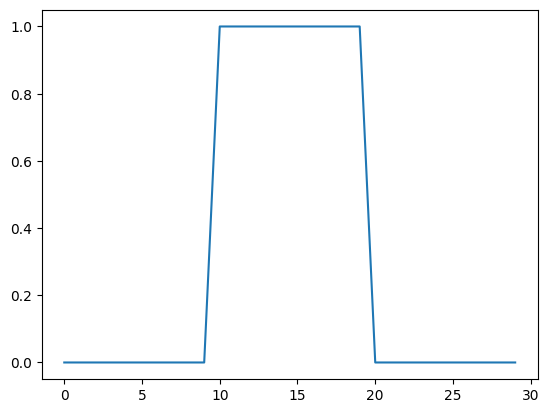

In [94]:
plt.plot(a)
plt.show()

Сигнал **b**

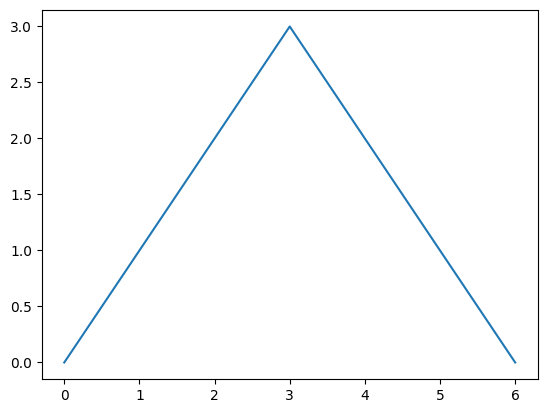

In [95]:
plt.plot(b)
plt.show()

Свертка **a** и **b**

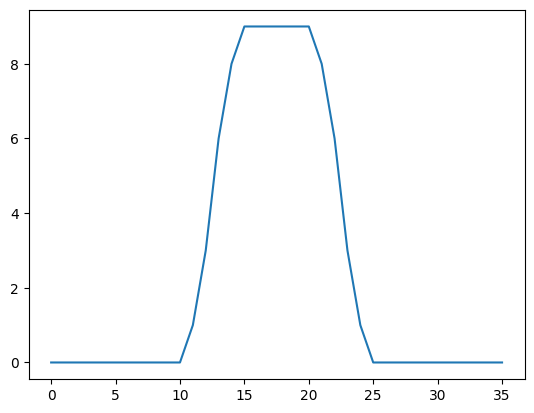

In [96]:
plt.plot(convolve(a, b))
plt.show()

Все 3 графика на одной картинке:

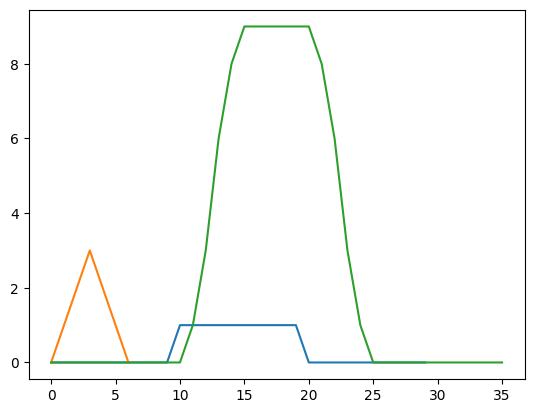

In [97]:
a_gr = np.arange(0, len(a))
b_gr = np.arange(0, len(b))
c = convolve(a, b)
c_gr = np.arange(0, len(c))

plt.plot(a_gr, a, b_gr, b, c_gr, c)
plt.show()

# Задание 4. * Алгоритм Карплуса-Стронга 

Реализуйте  [Алгоритм Карплуса-Стронга](https://en.wikipedia.org/wiki/Karplus%E2%80%93Strong_string_synthesis). В качестве фильтра используйте усреднитель двух смежных отсчетов. Проверьте результат. 

Отрисуйте и воспроизведите полученный сигнал. На что влияют параметры генерации? Попробуйте имитировать звучание разных струн гитары.

In [ ]:
def karplus_strong(noise, N):
    # Noise - input
    # N - number of samples to generate
    # return y - generated signal based on Noise 
    # YOUR CODE HERE

   

    raise NotImplementedError()

In [ ]:
np.random.seed(seed=1)
sample_rate = 44100 
frequency = 82.41
sec = 2
gen_len = sample_rate * sec
noise = (2 * np.random.uniform(-1, 1, int(sample_rate/frequency))) # [-1, 1]

gen_wav = karplus_strong(noise, gen_len)
assert np.allclose(gen_wav[:len(noise)], noise), "Generated signal must starting with noise"
assert np.allclose(gen_wav[len(noise)], (noise[0])/2), "Out of range samples eq 0."
assert np.allclose(gen_wav[len(noise)+1: 2*len(noise)], (noise[:-1] + noise[1:])/2), \
    "Bad requrent rule( 1 iteration)"
assert np.allclose(gen_wav[2*len(noise)], (noise[0]/2 + noise[-1])/2), \
    "Bad requrent rule( 2 iteration)"
assert np.allclose(gen_wav[2*len(noise)+2: 3*len(noise)], \
                   (((noise[:-1] + noise[1:])/2)[:-1] + ((noise[:-1] + noise[1:])/2)[1:])/2), \
    "Bad requrent rule( 3 iteration)"
print('All Ok!')

### Попробуем покрутить параметры генерации

Сгенерируем гитарные ноты:

In [ ]:
# YOUR CODE HERE

Визуализируем затухание амплитуды:

In [ ]:
plt.figure(figsize=(10,5))
plt.xlabel('n', fontsize=14)
plt.ylabel('Амплитуда', fontsize=14)
plt.xlim(0, gen_len)
plt.plot(np.linspace(0, gen_len+1, gen_len), gen_wav)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.grid()

Визуализируйте затухание амплитуд гитарных нот:

In [ ]:
# YOUR CODE HERE